In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tkinter as tk 
%gui tk
from tkinter import filedialog


In [2]:
data = pd.read_excel(r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\Gold\Data\Auronum Historic Gold Price Data.xlsx")
#here silver and gold data is incomplete as it has not price upto date so we use yfinance to extract the data 
import yfinance as yf 
import datetime as dt
# now here is a tecnical thing that this yfinance module has stored data in the specific name which is called ticker 
ticker_g = "GC=F" #this is ticker for gold futures
ticker_s = "SI=F" #for silver
start_s = "2024-9-27" #as from this date there is no  further data for silver
start_g = "2024-9-27"#for gold
end_time = dt.datetime.now().strftime('%Y-%m-%d')#using datetime module to extract now(today date ) in string format of year, month and day


excel_g = r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\Gold\Data\futher_gold.xlsx"
excel_s = r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\Gold\Data\futher_silver.xlsx"
print(f"downlading the further data of gold and silver for {ticker_g}, {ticker_s}")

try:
    gold_data = yf.download(ticker_g, start = start_g,end = end_time)#this syntax is for downlaoding which requires the ticker , start and end date
    silver_data = yf.download(ticker_s, start = start_s, end = end_time)
    if gold_data.empty :
        print("Download Unsucessful for gold" )
    else:
        print("downlaod sucessful for gold")
    if silver_data.empty :
        print("Download Unsucessful for silver" )
    else:
        print("downlaod sucessful for silver")
    gold_data.to_excel( excel_g, index = True)#converting this dataframe to excel
    silver_data.to_excel( excel_s, index = True)
except Exception as e:
    print(f" Unexpected error: {e}")
    
        



downlading the further data of gold and silver for GC=F, SI=F


C:\Users\BROTHER COMPUTER\AppData\Local\Temp\ipykernel_18380\1004371427.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download(ticker_g, start = start_g,end = end_time)#this syntax is for downlaoding which requires the ticker , start and end date
[*********************100%***********************]  1 of 1 completed
C:\Users\BROTHER COMPUTER\AppData\Local\Temp\ipykernel_18380\1004371427.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_data = yf.download(ticker_s, start = start_s, end = end_time)
[*********************100%***********************]  1 of 1 completed


downlaod sucessful for gold
downlaod sucessful for silver


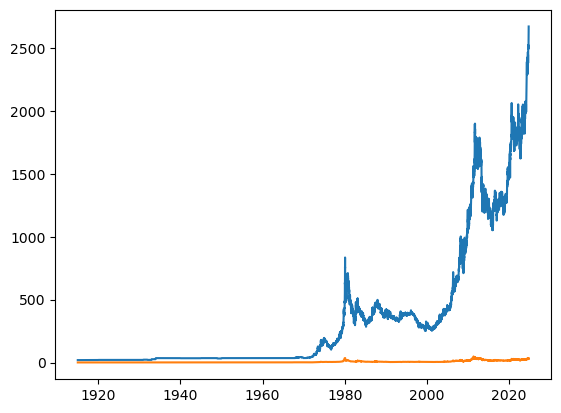

In [3]:
plt.plot( data["Gold"],data["price_g"])
plt.plot( data["Silver"], data["price_s"])

In [4]:
print("Nah! This is not the Graph I wanted")

Nah! This is not the Graph I wanted


In [5]:
import os#this is for interaction with operating  system
import sys#this is for interaction with interpreter i.e runtime environment
from pathlib import Path# This is for playing with path 

def find_and_add_module(module_name, search_paths=None, max_depth=5):
    """
    Find a Python module by name and add its directory to sys.path.
    
    Args:
        module_name (str): Name of the module to find (without .py extension)
        search_paths (list): List of paths to search. Defaults to common locations.
        max_depth (int): Maximum directory depth to search (default: 5)
    
    Returns:
        str: Path to the module if found, None otherwise
    """
    
    # Default search paths if none provided
    if search_paths is None:
        search_paths = [# this is lsit of possible main directory 
            str(Path.home()),  # Home directory
            str(Path.home() / "Documents"),
            str(Path.home() / "Desktop"),
            str(Path.home() / "Projects"),
            str(Path.home() / "Downloads"),
        ]
    
    # Add .py extension if not present
    if not module_name.endswith('.py'):
        module_name += '.py'
    
    print(f"Searching for '{module_name}'...")
    
    # Search for the module
    for search_path in search_paths:
        if not os.path.exists(search_path):
            continue
            
        print(f"Searching in: {search_path}")
        #here starts the main thing of this section, This os.walk dive depper into the layers of the given paths upto max_depth 
        for root, dirs, files in os.walk(search_path):#here os.walk gives three things:
            #roots which is stored as string , dirs are stores as list of folder names of that path , and files contains list of files of that folder
            # Calculate current depth
            depth = root[len(search_path):].count(os.sep)# this os.sep counts the '\' of the director and this get us to know that how deep we have gone in the directory
            if depth > max_depth:
                dirs[:] = []  # Don't go deeper . this is sayimg that that from start to end of the list make it empty if reached max depth
                continue
            
            # Check if module exists in current directory
            if module_name in files:
                module_path = os.path.join(root, module_name)
                module_dir = os.path.dirname(module_path)
                
                # Add to sys.path if not already present
                if module_dir not in sys.path:
                    sys.path.append(module_dir)
                    print(f"\n Found module at: {module_path}")
                    print(f"Added to sys.path: {module_dir}")
                    return module_path
                else:
                    print(f"\n✓ Found module at: {module_path}")
                    print(f"✓ Directory already in sys.path: {module_dir}")
                    return module_path
    
    print(f"\n✗ Module '{module_name}' not found in any search paths.")
    return None


def find_module_everywhere(module_name, max_depth=4):
    """
    Search for module starting from home directory.
    More comprehensive but slower search.
    
    Args:
        module_name (str): Name of the module to find
        max_depth (int): Maximum directory depth (default: 4)
    
    Returns:
        str: Path to the module if found, None otherwise
    """
    return find_and_add_module(
        module_name, 
        search_paths=[str(Path.home())],
        max_depth=max_depth
    )


# Example usage
if __name__ == "__main__":
    # Method 1: Search in common directories (faster)
    path = input("Enter the module name")
    module_path = find_and_add_module(path)
    
    # Method 2: Search everywhere from home (slower but more thorough)
    # module_path = find_module_everywhere("my_module", max_depth=5)
    
    if module_path:
        # Now you can import the module
        module_name_without_ext = os.path.splitext(os.path.basename(module_path))[0]#it actually takes the basename of the path only and then splitext split the extension and file name into tuple and that [0] means that youre chosing the file name not extention attached to it
        
        print(f"\nYou can now import using: import {module_name_without_ext}")
        
        # Example: Actually import it
        # exec(f"import {module_name_without_ext}")
    else:
        print("\nTips:")
        print("- Make sure the module name is correct")
        print("- Try increasing max_depth if your module is deeply nested")
        print("- Add more search_paths to the search_paths list")

Enter the module name data_refine


Searching for 'data_refine.py'...
Searching in: C:\Users\BROTHER COMPUTER

 Found module at: C:\Users\BROTHER COMPUTER\Python\mini projects\data science\projects\data_refine.py
Added to sys.path: C:\Users\BROTHER COMPUTER\Python\mini projects\data science\projects

You can now import using: import data_refine


In [8]:
import data_refine #this a programe which is developed by myself for refining the data columns as i need some specific data only..you can check it out in data folder


data_refine.choose()
input_gold = filedialog.askopenfilename(#this is for dialouge for choosing the files
    title = "Choose the file to use for gold to extract data",
    filetypes = [("Excel File","*.xlsx")]
)
input_silver = filedialog.askopenfilename(
    title = "Choose the file to use for silver to extract data",
    filetypes = [("Excel File","*.xlsx")]
)

    
if input_gold and input_silver:
    gold_data = pd.read_excel(input_gold)
    silver_data = pd.read_excel(input_silver)
    #reading the excel files
    df_date = gold_data["Date"]
    df_priceg = gold_data["Close"]
    
    df_d= silver_data["Date"]
    df_prices = silver_data["Close"]
    #as i want to extract data from these excel and then append those data to my main file for graph 
    data = pd.concat([
        data,
        pd.DataFrame({
            "Gold": gold_data["Date"],
            "price_g": gold_data["Close"]
            
        })
    ], ignore_index=True)
    data = pd.concat([data, 
                      pd.DataFrame({
                          "Silver": silver_data["Date"],
                          "price_s": silver_data["Close"]})], ignore_index= True)
else:
    print("you didint choose a file")
data.to_excel(r"C:\Users\BROTHER COMPUTER\Desktop\GIT_Project\Gold\Data\Auronum Historic Gold Price Datas.xlsx", index = False)
print("done")

How many excel file data do you want to clean: 2
how many numbers columns do you want to refine: 2
Enter the word which you want to extract the data of in column: Date


found the 'Date' in 3 row 


is it only numeric data or not. if yes then tyoe 'y' and if no , type 'n' n


Successfully extracted data to: C:/Users/BROTHER COMPUTER/Desktop/GIT_Project/Gold/Data/refine_gold.xlsx


Enter the word which you want to extract the data of in column: Close


found the 'Close' in 1 row 


is it only numeric data or not. if yes then tyoe 'y' and if no , type 'n' y


Successfully extracted data to: C:/Users/BROTHER COMPUTER/Desktop/GIT_Project/Gold/Data/refine_gold.xlsx
          Date        Close
0   2024-09-27  2644.300049
1   2024-09-30  2636.100098
2   2024-10-01  2667.300049
3   2024-10-02  2647.100098
4   2024-10-03  2657.100098
..         ...          ...
288 2025-11-18  4061.300049
289 2025-11-19  4077.699951
290 2025-11-20  4056.500000
291 2025-11-21  4076.699951
292 2025-11-24  4091.899902

[293 rows x 2 columns]


how many numbers columns do you want to refine: 2
Enter the word which you want to extract the data of in column: Date


found the 'Date' in 3 row 


is it only numeric data or not. if yes then tyoe 'y' and if no , type 'n' n


Successfully extracted data to: C:/Users/BROTHER COMPUTER/Desktop/GIT_Project/Gold/Data/refine_silver.xlsx


Enter the word which you want to extract the data of in column: Close


found the 'Close' in 1 row 


is it only numeric data or not. if yes then tyoe 'y' and if no , type 'n' y


Successfully extracted data to: C:/Users/BROTHER COMPUTER/Desktop/GIT_Project/Gold/Data/refine_silver.xlsx
          Date      Close
0   2024-09-27  31.518999
1   2024-09-30  31.164000
2   2024-10-01  31.445000
3   2024-10-02  31.628000
4   2024-10-03  32.188999
..         ...        ...
288 2025-11-18  50.450001
289 2025-11-19  50.790001
290 2025-11-20  50.247002
291 2025-11-21  49.873001
292 2025-11-24  50.294998

[293 rows x 2 columns]
done


In [9]:
import plotly.graph_objects as go
#this is the module for making a interactive graph..lets try it

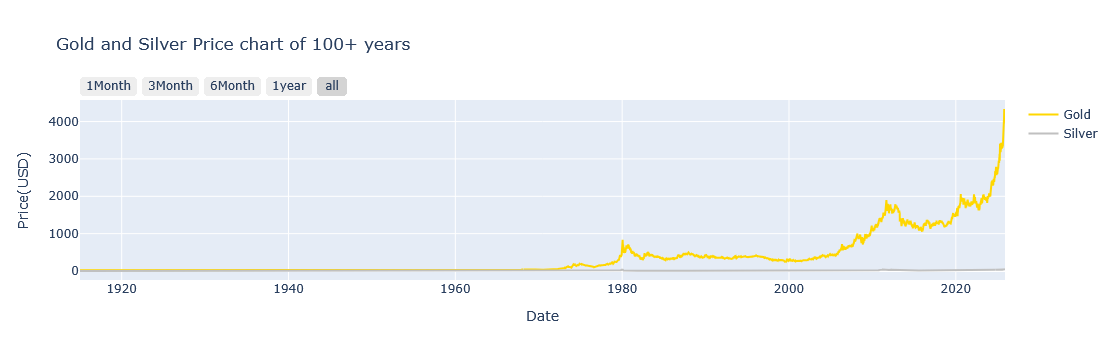

In [12]:
fig = go.Figure()#here Figure() is for making a canva ready for the graph
fig.add_trace(go.Scatter(#here add_traces is for making garph ready and go.scatter() is for scatter or line plot
    x = data["Gold"],#this is x-axis data
    y = data["price_g"],#this is y-axis data
    mode = "lines ",#this is suggesting that there should be dots in the data plotted(markers) and there should be line as well
    name = "Gold",#Just name
    line = dict(color = "gold",
               width = 2 )#this is for color of line

)              )
fig.add_trace(go.Scatter(
    x = data["Silver"],
    y = data["price_s"],
     mode = "lines",
         name="Silver",
    line = dict(color="Silver",
               width = 2)
    
))
fig.update_layout(#this method is for dealing with non-value things of plot...especially it is responsible for behaviour of plot
    title = "Gold and Silver Price chart of 100+ years",
    xaxis_title = "Date",
    yaxis_title = "Price(USD)",
    hovermode = "x unified"# this is for displaying a dialouge box which display info of the graph and "x unified" is for creating a vertical line and display the data touched by that verticle line


)
fig.update_xaxes(
    rangeselector = dict(#this just for making a range selector in the left corner of graph so you can get the desired look on graph
        buttons = list([
    dict(count = 1 , label = "1Month", step = "month", stepmode = "backward"),
    dict(count = 3 , label = "3Month", step = "month", stepmode = "backward"),
    dict(count = 6 , label = "6Month", step = "month", stepmode = "backward"),
    dict(count = 1, label = "1year", step ="year", stepmode= "backward"),
    dict(step = 'all')#this is for all the graph view
        ])
    )
)
fig.show()
